In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [56]:
os.listdir('./원본 DATA/')

['2020년 사회조사 결과 보도자료 통계표.xlsx',
 '[통합 문서1]업종코드',
 '건강보험심사평가원_요양기관 개설 현황_20211231.csv',
 '건강보험심사평가원_전국 병의원 및 약국 현황_20220630',
 '결론',
 '경남_의료기관종사_의료인력.csv',
 '경상남도 김해시_인구 및 세대 현황_20220731.csv',
 '경상남도_김해시_주정차금지(지정)구역_20220615.csv',
 '경상남도_의료기관 현황_20211019.csv',
 '공공의료기관.csv',
 '김해',
 '우편번호_DB',
 '응급의료기관.csv',
 '의료기관',
 '의료기관종사_의료인력_20221019133850.csv',
 '의료서비스_불만사항_성_행정구역_연령·교육정도·혼인상태별__20221011153627.csv',
 '의료시설의_의료서비스_만족도_및_불만이유_20221125135831.csv',
 '의료인력',
 '장비현황상세',
 '장애인,외국인',
 '전국_의료인력_현황_20221031102340.csv',
 '지역화폐',
 '한국행정구역분류_행정동코드(7자리)21년.csv',
 '한국행정구역분류_행정동코드(7자리)_20210701기준.xlsx',
 '행정구역_시군구_별__성별_인구수_20221017110605.csv',
 '행정구역_시군구_별__성별_인구수_20221031094943.csv',
 '행정동별_의료기관수.csv']

In [57]:
df = pd.read_csv('./전처리/의료인력/경상남도_의료인력.csv', encoding='cp949')

In [58]:
df

시군구별(1)  상근의사  치과의사  한의사   간호사  간호조무사  의료기사  기타종사자      계
0      창원시  2057   465  430  6066   4436  4173   4315  21942
1      진주시   902   172  134  2581   1488  1438   1284   7999
2      통영시   160    42   35   345    551   359    273   1765
3      사천시   144    41   43   366    508   258    345   1705
4      김해시   715   215  187  1796   2579  1617   2181   9290
5      밀양시   123    41   35   227    492   207    215   1340
6      거제시   234    86   53   760    705   555    656   3049
7      양산시   889   252  166  2599   1625  1126   2081   8738
8      의령군    25     7    8    58    108    53     90    349
9      함안군    63    20   18   152    260   142     94    749
10     창녕군    82    17   27   173    362   116    388   1165
11     고성군    54    12   19   128    192    90    156    651
12     남해군    43    12   19    44    129    67    111    425
13     하동군    39    15   15    56    101    72     67    365
14     산청군    29    10   20    55     78    33     38    263
15     함양군    44    12   15    55    100    58     64    348
16     거창군    77    19   19   181    278   122    255    951
17     합천군    53    17   25    87    174    68     65    489

In [59]:
df['의사'] = df['상근의사'] + df['치과의사'] +df['한의사']

In [60]:
df

시군구별(1)  상근의사  치과의사  한의사   간호사  간호조무사  의료기사  기타종사자      계    의사
0      창원시  2057   465  430  6066   4436  4173   4315  21942  2952
1      진주시   902   172  134  2581   1488  1438   1284   7999  1208
2      통영시   160    42   35   345    551   359    273   1765   237
3      사천시   144    41   43   366    508   258    345   1705   228
4      김해시   715   215  187  1796   2579  1617   2181   9290  1117
5      밀양시   123    41   35   227    492   207    215   1340   199
6      거제시   234    86   53   760    705   555    656   3049   373
7      양산시   889   252  166  2599   1625  1126   2081   8738  1307
8      의령군    25     7    8    58    108    53     90    349    40
9      함안군    63    20   18   152    260   142     94    749   101
10     창녕군    82    17   27   173    362   116    388   1165   126
11     고성군    54    12   19   128    192    90    156    651    85
12     남해군    43    12   19    44    129    67    111    425    74
13     하동군    39    15   15    56    101    72     67    365    69
14     산청군    29    10   20    55     78    33     38    263    59
15     함양군    44    12   15    55    100    58     64    348    71
16     거창군    77    19   19   181    278   122    255    951   115
17     합천군    53    17   25    87    174    68     65    489    95

In [61]:
df.drop(['상근의사', '치과의사', '한의사'], axis=1, inplace=True)

In [62]:
df.columns

Index(['시군구별(1)', '간호사', '간호조무사', '의료기사', '기타종사자', '계', '의사'], dtype='object')

In [63]:
df = df[['시군구별(1)', '의사', '간호사', '간호조무사', '의료기사', '기타종사자']]

In [64]:
df.set_index('시군구별(1)', inplace=True)

In [65]:
df

의사   간호사  간호조무사  의료기사  기타종사자
시군구별(1)                                
창원시      2952  6066   4436  4173   4315
진주시      1208  2581   1488  1438   1284
통영시       237   345    551   359    273
사천시       228   366    508   258    345
김해시      1117  1796   2579  1617   2181
밀양시       199   227    492   207    215
거제시       373   760    705   555    656
양산시      1307  2599   1625  1126   2081
의령군        40    58    108    53     90
함안군       101   152    260   142     94
창녕군       126   173    362   116    388
고성군        85   128    192    90    156
남해군        74    44    129    67    111
하동군        69    56    101    72     67
산청군        59    55     78    33     38
함양군        71    55    100    58     64
거창군       115   181    278   122    255
합천군        95    87    174    68     65

In [66]:
df = df.iloc[::-1]

In [67]:
df

의사   간호사  간호조무사  의료기사  기타종사자
시군구별(1)                                
합천군        95    87    174    68     65
거창군       115   181    278   122    255
함양군        71    55    100    58     64
산청군        59    55     78    33     38
하동군        69    56    101    72     67
남해군        74    44    129    67    111
고성군        85   128    192    90    156
창녕군       126   173    362   116    388
함안군       101   152    260   142     94
의령군        40    58    108    53     90
양산시      1307  2599   1625  1126   2081
거제시       373   760    705   555    656
밀양시       199   227    492   207    215
김해시      1117  1796   2579  1617   2181
사천시       228   366    508   258    345
통영시       237   345    551   359    273
진주시      1208  2581   1488  1438   1284
창원시      2952  6066   4436  4173   4315

In [68]:
df['총합계'] = df['의사'] + df['간호사'] + df['간호조무사'] + df['의료기사'] + df['기타종사자']

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18260\2001794313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['총합계'] = df['의사'] + df['간호사'] + df['간호조무사'] + df['의료기사'] + df['기타종사자']


In [69]:
df

의사   간호사  간호조무사  의료기사  기타종사자    총합계
시군구별(1)                                       
합천군        95    87    174    68     65    489
거창군       115   181    278   122    255    951
함양군        71    55    100    58     64    348
산청군        59    55     78    33     38    263
하동군        69    56    101    72     67    365
남해군        74    44    129    67    111    425
고성군        85   128    192    90    156    651
창녕군       126   173    362   116    388   1165
함안군       101   152    260   142     94    749
의령군        40    58    108    53     90    349
양산시      1307  2599   1625  1126   2081   8738
거제시       373   760    705   555    656   3049
밀양시       199   227    492   207    215   1340
김해시      1117  1796   2579  1617   2181   9290
사천시       228   366    508   258    345   1705
통영시       237   345    551   359    273   1765
진주시      1208  2581   1488  1438   1284   7999
창원시      2952  6066   4436  4173   4315  21942

In [70]:
df.columns[::-1]

Index(['총합계', '기타종사자', '의료기사', '간호조무사', '간호사', '의사'], dtype='object')

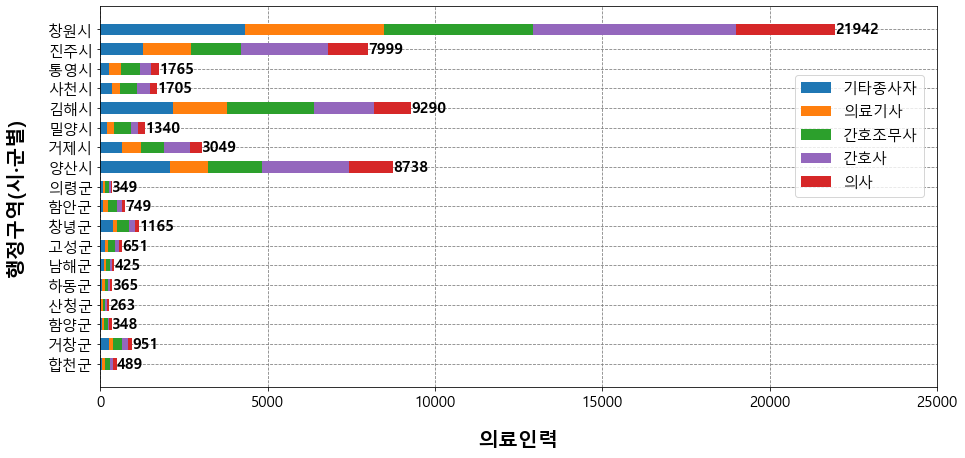

In [73]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

ax.tick_params(axis = 'y', )


x = df['의사']
y = df['간호사']
z = df['간호조무사']
a = df['의료기사']
b = df['기타종사자']


data = [b, a, z ,y, x]


y_array = df.index
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728']


for i in range(0, 5):
    barh = plt.barh(
        y = y_array,
        width = data[i],
        height=0.6,
        left=np.sum(data[:i], axis=0),
        color = color[i],
        alpha=1)
    
    
for n in range(len(barh.patches)):
    p = barh.patches[n]
    w = df['총합계'][n]
    x, y, width, height = p.get_bbox().bounds
    ax.text(w+0.2, y+height/2, "%.0f" %(w), va='center', size = 15,fontweight = 'bold')
    
    
    
plt.xlabel('의료인력', labelpad=20, size=20, weight ='bold')
plt.ylabel('행정구역(시·군별)', labelpad=20, size=20, weight ='bold')
plt.legend(['기타종사자', '의료기사', '간호조무사', '간호사', '의사'], loc = (0.83, 0.5) )
plt.xlim(0,25000)
plt.show()

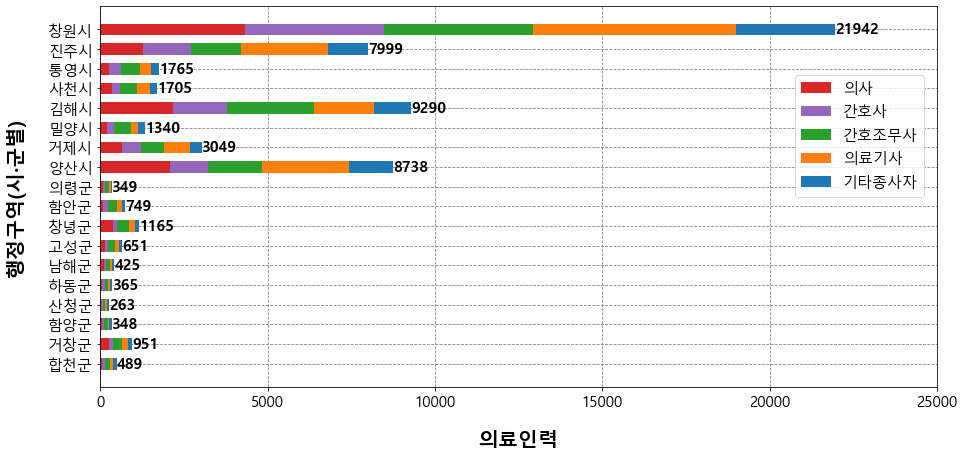

In [72]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

ax.tick_params(axis = 'y', )


x = df['의사']
y = df['간호사']
z = df['간호조무사']
a = df['의료기사']
b = df['기타종사자']


data = [b, a, z ,y, x]


y_array = df.index
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728']
color = color[::-1]

for i in range(0, 5):
    barh = plt.barh(
        y = y_array,
        width = data[i],
        height=0.6,
        left=np.sum(data[:i], axis=0),
        color = color[i],
        alpha=1)
    
    
for n in range(len(barh.patches)):
    p = barh.patches[n]
    w = df['총합계'][n]
    x, y, width, height = p.get_bbox().bounds
    ax.text(w+0.2, y+height/2, "%.0f" %(w), va='center', size = 15,fontweight = 'bold')
    
    
    
plt.xlabel('의료인력', labelpad=20, size=20, weight ='bold')
plt.ylabel('행정구역(시·군별)', labelpad=20, size=20, weight ='bold')
plt.legend(mm, loc = (0.83, 0.5) )
plt.xlim(0,25000)
plt.show()

In [50]:
mm = ['기타종사자', '의료기사', '간호조무사', '간호사', '의사']
mm = mm[::-1]

In [51]:
mm

['의사', '간호사', '간호조무사', '의료기사', '기타종사자']